<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/syma_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
# Load the dataset
data = pd.read_csv('dataset-a.csv')
X=data.values
print("Shape of the dataset:", X.shape)


Shape of the dataset: (1430, 2)


In [17]:
X[:4]

array([[6.00609434e+01, 7.92003179e-06],
       [6.01500902e+01, 1.18811294e-05],
       [5.96097930e+01, 7.39564099e-06],
       [6.00255681e+01, 9.36751482e-06]])

In [30]:
data.head()

,x0,x1
0,60.060943,0.000008
1,60.150090,0.000012
2,59.609793,0.000007
3,60.025568,0.000009
4,59.996640,0.000008


In [23]:
def PCA(X,num_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean


    n_samples = X.shape[0]
    covariance_matrix = (1 / n_samples) * np.dot(X_centered.T, X_centered)


    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    max_eigenvalues = eigenvalues[:num_components]
    max_eigenvectors = eigenvectors[:, :num_components]


    projected_data = np.dot(X_centered, max_eigenvectors)
    return projected_data

data_2d=PCA(X,2)
data_2d.shape


(1430, 2)

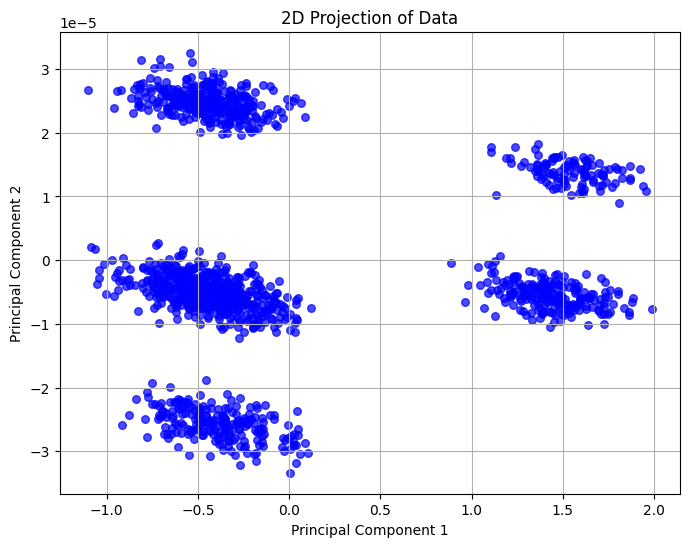

In [27]:
import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', s=30, alpha=0.7)
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [73]:
init_centroids = np.array([[1,1], [2, 1], [1,-1], [0,1.5], [-0.5,1.5]])


In [74]:


def find_closest_centroids(X,init_centroids):
  m=data_2d.shape[0]
  K=init_centroids.shape[0]
  idx=np.zeros((m,1))
  for i in range(m):
    distance=np.inf
    for j in range(K):
      dis=np.linalg.norm(X[i]-init_centroids[j])
      if dis<distance:
        distance=dis
        idx[i]=j
  return idx
idx=find_closest_centroids(data_2d,init_centroids)


In [75]:
m,n=data_2d.shape
def compute_centroids(X, idx, K):
  centroids = np.zeros((K,X.shape[1]))
  for k in range(K):
    cent=[]
    for i in range(m):
      if idx[i]==k:
        cent.append(X[i])

    centroids[k]=np.mean(cent,axis=0)

  return centroids
compute_centroids(data_2d,idx,5)

array([[ 1.01024082e+00,  1.67033678e-05],
       [ 1.65292111e+00,  2.82446717e-06],
       [ 9.20232955e-01, -8.30215652e-06],
       [-1.96881145e-01, -4.58508054e-06],
       [-5.12715491e-01,  1.00106286e-06]])

In [ ]:

def plotkMeans(idx,num_CL,C_H,it):
    colors = ('b','g','r','c','m','y','k')

    plt.figure
    for i in range(num_CL):
        CL_i = X[np.where(idx == i)[0],:]
        plt.plot(CL_i[:,0],CL_i[:,1], colors[i]+'o',)
        plt.plot(C_H[i,0,0:it+2],C_H[i,1,0:it+2],'kx-')

    plt.show()
    return 0

def runkMeans(X,init_cents,max_iters,plotProgress= False):

    m, n = X.shape
    k = init_cents.shape[0]
    idx = np.zeros((m))
    centroids = init_cents
    cent_hist = np.zeros((init_cents.shape[0],init_cents.shape[1],max_iters+1))
    cent_hist[:,:,0] = init_cents

    # K-Means:
    for i in range(max_iters):

        print('Running the {} iteration of {}'.format(i+1,max_iters))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        cent_hist[:,:,i+1] = centroids
        if plotProgress:
            plotkMeans(idx,init_cents.shape[0],cent_hist,i)

    return centroids, idx